## Handling Class Imbalance
1. Different Evaluation Metric
2. Resampling (Undersampling and Oversampling)
3. BalancedBaggingClassifier
4. SMOTE
5. Threshold Moving
6. Using Tree Based Models
7. Using Anomaly Detection Algorithms

[https://www.geeksforgeeks.org/machine-learning/handling-imbalanced-data-for-classification/]

**Different Evaluation Metric**

Precision, Recall and F1-score instead of accuracy

In [1]:
### Resampling
import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Create an imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)

print("Original class distribution:", Counter(y))

Original class distribution: Counter({np.int64(1): 900, np.int64(0): 100})


In [2]:
# Oversampling using RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
print("Oversampled class distribution:", Counter(y_over))

Oversampled class distribution: Counter({np.int64(1): 900, np.int64(0): 900})


In [3]:
# Undersampling using RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)
print("Undersampled class distribution:", Counter(y_under))

Undersampled class distribution: Counter({np.int64(0): 100, np.int64(1): 100})


**Balanced Bagging Classifier**

* balance each bootstrap
* minority class is not ignored during training
* resamples data internally 

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

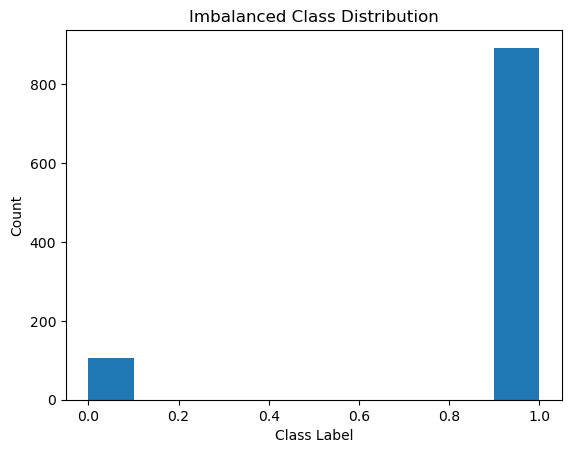

In [8]:
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=2,
    weights=[0.1, 0.9],
    n_informative=3,
    n_redundant=1,
    random_state=42
)

plt.figure()
plt.hist(y)
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.title("Imbalanced Class Distribution")
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
base_classifier = RandomForestClassifier(random_state=42)

balanced_bagging = BalancedBaggingClassifier(
    estimator=base_classifier,
    sampling_strategy='auto',
    replacement=False,
    random_state=42
)

In [13]:
balanced_bagging.fit(X_train, y_train)
y_pred = balanced_bagging.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.72      0.65        18
           1       0.97      0.95      0.96       182

    accuracy                           0.93       200
   macro avg       0.78      0.84      0.81       200
weighted avg       0.94      0.93      0.93       200



**Synthetic Minority Oversampling Technique (SMOTE)**
* creating new synthetic samples
* a minority class points selected, then its k-nearest neighbors, then a sythetic data generated between the point and one of its neighbors


In [14]:
from imblearn.over_sampling import SMOTE
from collections import Counter

X, y = make_classification(
    n_classes=2,
    class_sep=2,
    weights=[0.1, 0.9],
    n_informative=3,
    n_redundant=1,
    flip_y=0,
    n_features=20,
    n_clusters_per_class=1,
    n_samples=1000,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
print("Class distribution before SMOTE:", Counter(y_train))
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution before SMOTE: Counter({np.int64(1): 713, np.int64(0): 87})
Class distribution after SMOTE: Counter({np.int64(1): 713, np.int64(0): 713})


**Threshold Moving**

Ways to find the best threshold:

* ROC Curve: Choose the threshold that balances true positive rate and false positive rate.
* Precision-Recall Curve: Especially useful for imbalanced data to maximize precision and recall.
* Grid Search / Range Testing: Experiment with multiple threshold values to find the one that gives the best performance metrics.

note: F1 is higher when both precision and recall are high, and lower if there is a significant discrepancy.

In [21]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_proba = model.predict_proba(X_test)[:, 1]

threshold = 0.6


while threshold >= 0:
    y_pred = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)

    print(f"Threshold: {threshold:.2f}, F1 Score: {f1:.4f}")

  
    threshold -= 0.1

Threshold: 0.60, F1 Score: 1.0000
Threshold: 0.50, F1 Score: 1.0000
Threshold: 0.40, F1 Score: 1.0000
Threshold: 0.30, F1 Score: 1.0000
Threshold: 0.20, F1 Score: 0.9947
Threshold: 0.10, F1 Score: 0.9842
Threshold: 0.00, F1 Score: 0.9664


**Using Tree Based Models**
* Decision Trees: By changing the decision boundaries to incorporate minority class patterns, decision trees can react to data that is unbalanced.
* Random Forests: Random Forests improve generalization by reducing overfitting and strengthening robustness against imbalanced datasets by mixing numerous trees.
* Gradient Boosted Trees:  Gradient Boosted Trees perform well in imbalanced circumstances because of their ability to concentrate on misclassified occurrences through sequential learning. 